In [1]:
import pandas as pd;
import numpy as np;
import re;
import os;
from tqdm.notebook import tqdm;
from sklearn import preprocessing
from datetime import datetime,timedelta
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df=pd.read_excel(r"D:\Antai\Program\结肠癌分类器\Final\combined_data.xlsx")

In [29]:
pd.set_option('display.max_columns', None)
#pd.set_option('max_colwidth',100)
des=df.describe()
des

,Unnamed: 0,年龄,血_白细胞计数,血_淋巴细胞计数,血_单核细胞计数,血_中性粒细胞计数,血_嗜酸粒细胞计数,血_嗜碱粒细胞计数,血_淋巴细胞,血_单核细胞,血_嗜酸粒细胞,血_嗜碱粒细胞,血_中性粒细胞,血_红细胞计数,血_血红蛋白,血_红细胞比积,血_平均红细胞体积,血_平均红细胞血红蛋白含量,血_平均红细胞血红蛋白浓度,血_红细胞分布宽度,血_血小板计数,血_平均血小板体积,血_血小板压积,血_血小板分布宽度,血_大血小板细胞比率,血_尿素,血_钠,血_钾,血_氯,血_葡萄糖,血_肌酐,血_二氧化碳结合力,血_尿酸,血_糖类抗原CA199,血_总胆红素,血_直接胆红素,血_总蛋白,血_白蛋白,血_球蛋白,血_白蛋白/球蛋白,血_丙氨酸氨基转移酶,血_门冬氨酸氨基转移酶,血_碱性磷酸酶,血_总胆汁酸,血_γ-谷氨酰转肽酶,血_前白蛋白,血_乳酸脱氢酶,血_间接胆红素,尿_比重,尿_酸碱度,尿_白细胞正常,尿_白细胞异常,尿_白细胞数据缺失,尿_亚硝酸盐正常,尿_亚硝酸盐异常,尿_亚硝酸盐数据缺失,尿_蛋白质正常,尿_蛋白质异常,尿_蛋白质数据缺失,尿_葡萄糖,尿_酮体正常,尿_酮体异常,尿_酮体数据缺失,尿_尿胆原正常,尿_尿胆原异常,尿_尿胆原数据缺失,尿_胆红素正常,尿_胆红素异常,尿_胆红素数据缺失,尿_红细胞血红蛋白正常,尿_红细胞血红蛋白异常,尿_红细胞血红蛋白数据缺失,粪_粪粘度正常,粪_粪粘度异常,粪_粪粘度数据缺失,粪_粪血液正常,粪_粪血液异常,粪_粪血液数据缺失,粪_粪不消化食物正常,粪_粪不消化食物异常,粪_粪不消化食物数据缺失,粪_粪红细胞正常,粪_粪红细胞异常,粪_粪红细胞数据缺失,粪_粪白细胞正常,粪_粪白细胞异常,粪_粪白细胞数据缺失,粪_粪巨噬细胞正常,粪_粪巨噬细胞异常,粪_粪巨噬细胞数据缺失,粪_粪硬度正常,粪_粪硬度异常,粪_粪硬度数据缺失,粪_粪颜色正常,粪_粪颜色异常,粪_粪颜色数据缺失,血_癌胚抗原,粪_粪隐血正常,粪_粪隐血异常,粪_粪隐血数据缺失,粪_粪转铁蛋白正常,粪_粪转铁蛋白异常,粪_粪转铁蛋白数据缺失,性别,体重,身高,癌,癌前病变,良性疾病,健康或非结肠疾病
count,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.00000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26657.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26657.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.0,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,26658.000000,25022.000000,25023.000000,25023.000000,26658.000000,26658.000000,26658.000000,26658.000000
mean,13328.500000,57.234076,6.403596,1.744106,0.452471,4.010848,0.147394,0.025527,28.950855,7.373535,2.418557,0.423010,60.817192,4.349503,131.723047,38.779913,91.269386,30.346932,332.219709,13.940866,200.375047,10.327684,0.205094,13.973345,28.377425,5.219600,141.794058,4.055803,103.618876,5.793799,71.217608,25.938668,4.27184,18.989353,13.815485,4.278828,68.830445,41.663527,27.742816,1.515189,25.471566,25.189437,80.983270,5.555813,43.228149,223.850551,179.307750,9.330377,1.017963,5.990603,0.677395,0.220984,0.101621,0.874447,0.023858,0.101696,0.826169,0.072136,0.101696,6.946671,0.808425,0.089879,0.101696,0.853477,0.044827,0.101696,0.878648,0.019656,0.101696,0.653087,0.245217,0.101696,0.708380,0.069773,0.221847,0.711044,0.066959,0.221997,0.725448,0.052667,0.221885,0.640221,0.137857,0.221922,0.0,0.778078,0.221922,0.730475,0.047453,0.222072,0.571311,0.207067,0.221622,0.674732,0.103909,0.221359,8.028523,0.425013,0.279391,0.295596,0.378873,0.169067,0.452059,0.632364,66.030228,166.352289,0.381311,0.216558,0.190037,0.212094
std,7695.646074,12.733576,3.334884,0.716230,0.190981,2.174953,0.162779,0.018231,10.719932,2.637667,2.306849,0.300734,11.782459,0.595131,19.086990,7.501756,6.697687,2.790973,14.475137,2.700465,66.396919,1.321580,0.067732,2.709786,9.531016,2.093669,2.965593,0.371933,2.992418,1.645367,31.249887,1.690729,35.64544,64.875381,11.537266,7.387486,6.635386,5.352982,4.484453,0.274096,27.797124,38.937197,55.572036,10.363985,71.280722,71.019243,84.407921,5.189098,0.007197,0.681300,0.467482,0.414918,0.302154,0.331351,0.152609,0.302253,0.378972,0.258718,0.302253,6.565493,0.393548,0.286014,0.302253,0.353636,0.206928

### 解决问题1.1，最大值是不是有些过于大，需要复核

In [30]:
judge=pd.DataFrame(des.loc["max"]>des.loc["mean"]+20*des.loc["std"]).T
s=pd.DataFrame()
for i in judge.columns:
    if judge[i].loc[0]==True:
        s=pd.concat([s,des[i]],axis=1,ignore_index=False)

In [40]:
s.to_excel(r"D:\Antai\Program\结肠癌分类器\Final\Data Deep Clean\max_outlier_check.xlsx")

### 解决问题1.2，出现负值的问题

In [31]:
des[des<0]
#二氧化碳结合力与间接胆红素有负值出现
df[df["血_二氧化碳结合力"]<0]["血_二氧化碳结合力"] ###6921行有一个-25应该是写错了
df["血_二氧化碳结合力"].loc[6921]=25

df[df["血_间接胆红素"]<0]["血_间接胆红素"] ##9769行有一个-0.2，并不像明显的笔误，所以drop掉
df.drop(axis=0,index=9769,inplace=True)
#df.reset_index(inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 身高体重处理

In [32]:
pd.set_option('display.max_rows', None)
problem_index=df[df["体重"]>df["身高"]-40].index

for i in problem_index:
    if df["体重"].loc[i]>100 or df["身高"].loc[i]>100: #有一些身高都不到100的明显不正常
        if df["体重"].loc[i]-40>df["身高"].loc[i]: #对应体重身高只是写反的情况
            weight=df["体重"].loc[i]
            df["身高"].loc[i]=df["体重"].loc[i]
            df["体重"].loc[i]=weight #交换体重身高
        else:
            df.drop(axis=0,index=i,inplace=True)
    else:
        df.drop(axis=0,index=i,inplace=True)

#df.reset_index(inplace=True)


In [33]:
pd.set_option('display.max_rows', 20)
df

,Unnamed: 0,PATIENT_ID,年龄,血_白细胞计数,血_淋巴细胞计数,血_单核细胞计数,血_中性粒细胞计数,血_嗜酸粒细胞计数,血_嗜碱粒细胞计数,血_淋巴细胞,血_单核细胞,血_嗜酸粒细胞,血_嗜碱粒细胞,血_中性粒细胞,血_红细胞计数,血_血红蛋白,血_红细胞比积,血_平均红细胞体积,血_平均红细胞血红蛋白含量,血_平均红细胞血红蛋白浓度,血_红细胞分布宽度,血_血小板计数,血_平均血小板体积,血_血小板压积,血_血小板分布宽度,血_大血小板细胞比率,血_尿素,血_钠,血_钾,血_氯,血_葡萄糖,血_肌酐,血_二氧化碳结合力,血_尿酸,血_糖类抗原CA199,血_总胆红素,血_直接胆红素,血_总蛋白,血_白蛋白,血_球蛋白,血_白蛋白/球蛋白,血_丙氨酸氨基转移酶,血_门冬氨酸氨基转移酶,血_碱性磷酸酶,血_总胆汁酸,血_γ-谷氨酰转肽酶,血_前白蛋白,血_乳酸脱氢酶,血_间接胆红素,尿_比重,尿_酸碱度,尿_白细胞正常,尿_白细胞异常,尿_白细胞数据缺失,尿_亚硝酸盐正常,尿_亚硝酸盐异常,尿_亚硝酸盐数据缺失,尿_蛋白质正常,尿_蛋白质异常,尿_蛋白质数据缺失,尿_葡萄糖,尿_酮体正常,尿_酮体异常,尿_酮体数据缺失,尿_尿胆原正常,尿_尿胆原异常,尿_尿胆原数据缺失,尿_胆红素正常,尿_胆红素异常,尿_胆红素数据缺失,尿_红细胞血红蛋白正常,尿_红细胞血红蛋白异常,尿_红细胞血红蛋白数据缺失,粪_粪粘度正常,粪_粪粘度异常,粪_粪粘度数据缺失,粪_粪血液正常,粪_粪血液异常,粪_粪血液数据缺失,粪_粪不消化食物正常,粪_粪不消化食物异常,粪_粪不消化食物数据缺失,粪_粪红细胞正常,粪_粪红细胞异常,粪_粪红细胞数据缺失,粪_粪白细胞正常,粪_粪白细胞异常,粪_粪白细胞数据缺失,粪_粪巨噬细胞正常,粪_粪巨噬细胞异常,粪_粪巨噬细胞数据缺失,粪_粪硬度正常,粪_粪硬度异常,粪_粪硬度数据缺失,粪_粪颜色正常,粪_粪颜色异常,粪_粪颜色数据缺失,血_癌胚抗原,粪_粪隐血正常,粪_粪隐血异常,粪_粪隐血数据缺失,粪_粪转铁蛋白正常,粪_粪转铁蛋白异常,粪_粪转铁蛋白数据缺失,性别,体重,身高,癌,癌前病变,良性疾病,健康或非结肠疾病
0,0,K00221060,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,0.0,0.5,60.8,5.08,173,48.40,95.3,34.1,357,13.6,99,9.5,0.09,10.7,21.9,4.1,141,4.5,101,5.6,86,27,0.36,7.94,5.3,2.4,69,39.0,30,1.30,44,41,80,5.1,51,147,249,2.9,1.018,6.0,0,0,1,0,0,1,0,0,1,6.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,2.23,0,0,1,0,0,1,1.0,72.0,180.0,0,0,1,0
1,1,K00797289,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,1.1,0.0,73.5,4.81,149,43.50,90.4,31.0,343,12.9,101,10.4,0.11,12.4,28.0,4.0,142,4.0,106,4.0,56,26,0.26,7.94,19.4,6.9,72,47.0,25,1.88,16,22,68,6.5,38,192,152,12.5,1.005,8.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,2.23,0,0,1,0,0,1,1.0,80.0,176.0,0,0,1,0
2,2,K06570229,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,2.7,0.5,54.4,3.68,122,35.20,95.7,33.2,347,12.8,167,9.2,0.15,9.5,17.6,3.9,136,4.2,97,6.3,80,25,0.21,27.91,5.3,1.6,70,43.0,27,1.59,6,17,109,2.2,26,210,126,3.7,1.008,6.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1.69,0,0,1,0,0,1,0.0,50.0,160.0,0,1,0,0
3,3,01828787,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,1.6,0.0,69.7,3.84,125,37.20,96.9,32.6,336,12.4,187,9.6,0.18,10.4,21.6,8.3,146,4.1,105,5.6,85,26,0.27,7.94,7.3,2.2,74,45.0,29,1.55,14,16,38,10.1,11,224,146,5.1,1.010,6.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,2.23,0,0,1,0,0,1,NaN,NaN,NaN,0,0,0,1
4,4,J01820164,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,2.1,0.4,59.1,3.06,99,27.90,91.2,32.4,355,11.6,175,9.2,0.16,9.1,17.7,4.9,132,3.8,100,9.7,66,26,0.38,7.94,7.7,2.3,63,37.0,26,1.42,11,18,66,2.3,18,199,143,5.4,1.010,5.0,0,1,0,0,1,0,0,1,0,6.0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,3.63,0,0,1,0,0,1,0.0,72.0,155.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26653,26653,05893227,48,13.84,1.46,1.24,9.87,1.20,0.07,10.5,9.0,8.7,0.5,71.3,4.19,125,39.00,93.1,29.8,321,12.4,273,11.0,0.30,14.0,33.7,12.9,138,4.7,103,5.7,69,22,0.47,7.94,5.9,1.9,75,38.0,37,1.03,36,27,299,2.4,178,208,258,4.0,1.014,5.0,1,0,0,1,0,0,0,1,0,6.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,2.23,0,0,1,0,0,1,NaN,NaN,NaN,0,0,1,0
26654,26654,05759397,56,4.58,1.45,0.38,2.49,0.23,0.03,31.7,8.3,5.0,0.7,54.3,4.41,147,43.10,97.7,33.3,341,12.5,219,10.0,0.22,11.0,23.8,5.0,142,4.1,105,5.4,69,26,0.31,7.94,12.6,2.2,71,48.0,23,2.09,32,20,80,3.4,42,224,182,10.4,1.013,7.5,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2.23,1,0,0,1,0,0,1.0,59.0,165.0,0,0,1,0
26655,26655,05813671,56,5.88,2.60,0.52,2.58,0.14,0.04,44.2,8.8,2.4,0.7,43.9,4.12,129,40

### 全0的一项修改，实际上是判断“正常”出错的,我们需要修改回来

In [34]:
std_data=pd.read_excel(r"D:/Antai/Program/结肠癌分类器/Final/std_data.xlsx")
for i in std_data.index:
    try:
        if std_data["粪_粪白细胞"].loc[i] in ["正常","阴性","NEG","-"," -","软","黄色"]: 
            index=df[df["PATIENT_ID"].isin([std_data["PATIENT_ID"].loc[i]])]
            df["粪_粪白细胞正常"].loc[i]=1
            df["粪_粪白细胞异常"].loc[i]=0
    except:
        pass;


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 加上BMI指数

In [35]:
df.insert(loc=len(df.columns)-2,column="BMI",value=df["体重"]/(df["身高"]**2)*10000)
df

,Unnamed: 0,PATIENT_ID,年龄,血_白细胞计数,血_淋巴细胞计数,血_单核细胞计数,血_中性粒细胞计数,血_嗜酸粒细胞计数,血_嗜碱粒细胞计数,血_淋巴细胞,血_单核细胞,血_嗜酸粒细胞,血_嗜碱粒细胞,血_中性粒细胞,血_红细胞计数,血_血红蛋白,血_红细胞比积,血_平均红细胞体积,血_平均红细胞血红蛋白含量,血_平均红细胞血红蛋白浓度,血_红细胞分布宽度,血_血小板计数,血_平均血小板体积,血_血小板压积,血_血小板分布宽度,血_大血小板细胞比率,血_尿素,血_钠,血_钾,血_氯,血_葡萄糖,血_肌酐,血_二氧化碳结合力,血_尿酸,血_糖类抗原CA199,血_总胆红素,血_直接胆红素,血_总蛋白,血_白蛋白,血_球蛋白,血_白蛋白/球蛋白,血_丙氨酸氨基转移酶,血_门冬氨酸氨基转移酶,血_碱性磷酸酶,血_总胆汁酸,血_γ-谷氨酰转肽酶,血_前白蛋白,血_乳酸脱氢酶,血_间接胆红素,尿_比重,尿_酸碱度,尿_白细胞正常,尿_白细胞异常,尿_白细胞数据缺失,尿_亚硝酸盐正常,尿_亚硝酸盐异常,尿_亚硝酸盐数据缺失,尿_蛋白质正常,尿_蛋白质异常,尿_蛋白质数据缺失,尿_葡萄糖,尿_酮体正常,尿_酮体异常,尿_酮体数据缺失,尿_尿胆原正常,尿_尿胆原异常,尿_尿胆原数据缺失,尿_胆红素正常,尿_胆红素异常,尿_胆红素数据缺失,尿_红细胞血红蛋白正常,尿_红细胞血红蛋白异常,尿_红细胞血红蛋白数据缺失,粪_粪粘度正常,粪_粪粘度异常,粪_粪粘度数据缺失,粪_粪血液正常,粪_粪血液异常,粪_粪血液数据缺失,粪_粪不消化食物正常,粪_粪不消化食物异常,粪_粪不消化食物数据缺失,粪_粪红细胞正常,粪_粪红细胞异常,粪_粪红细胞数据缺失,粪_粪白细胞正常,粪_粪白细胞异常,粪_粪白细胞数据缺失,粪_粪巨噬细胞正常,粪_粪巨噬细胞异常,粪_粪巨噬细胞数据缺失,粪_粪硬度正常,粪_粪硬度异常,粪_粪硬度数据缺失,粪_粪颜色正常,粪_粪颜色异常,粪_粪颜色数据缺失,血_癌胚抗原,粪_粪隐血正常,粪_粪隐血异常,粪_粪隐血数据缺失,粪_粪转铁蛋白正常,粪_粪转铁蛋白异常,粪_粪转铁蛋白数据缺失,性别,体重,身高,癌,癌前病变,BMI,良性疾病,健康或非结肠疾病
0,0,K00221060,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,0.0,0.5,60.8,5.08,173,48.40,95.3,34.1,357,13.6,99,9.5,0.09,10.7,21.9,4.1,141,4.5,101,5.6,86,27,0.36,7.94,5.3,2.4,69,39.0,30,1.30,44,41,80,5.1,51,147,249,2.9,1.018,6.0,0,0,1,0,0,1,0,0,1,6.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,2.23,0,0,1,0,0,1,1.0,72.0,180.0,0,0,22.222222,1,0
1,1,K00797289,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,1.1,0.0,73.5,4.81,149,43.50,90.4,31.0,343,12.9,101,10.4,0.11,12.4,28.0,4.0,142,4.0,106,4.0,56,26,0.26,7.94,19.4,6.9,72,47.0,25,1.88,16,22,68,6.5,38,192,152,12.5,1.005,8.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,2.23,0,0,1,0,0,1,1.0,80.0,176.0,0,0,25.826446,1,0
2,2,K06570229,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,2.7,0.5,54.4,3.68,122,35.20,95.7,33.2,347,12.8,167,9.2,0.15,9.5,17.6,3.9,136,4.2,97,6.3,80,25,0.21,27.91,5.3,1.6,70,43.0,27,1.59,6,17,109,2.2,26,210,126,3.7,1.008,6.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1.69,0,0,1,0,0,1,0.0,50.0,160.0,0,1,19.531250,0,0
3,3,01828787,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,1.6,0.0,69.7,3.84,125,37.20,96.9,32.6,336,12.4,187,9.6,0.18,10.4,21.6,8.3,146,4.1,105,5.6,85,26,0.27,7.94,7.3,2.2,74,45.0,29,1.55,14,16,38,10.1,11,224,146,5.1,1.010,6.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,2.23,0,0,1,0,0,1,NaN,NaN,NaN,0,0,NaN,0,1
4,4,J01820164,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,2.1,0.4,59.1,3.06,99,27.90,91.2,32.4,355,11.6,175,9.2,0.16,9.1,17.7,4.9,132,3.8,100,9.7,66,26,0.38,7.94,7.7,2.3,63,37.0,26,1.42,11,18,66,2.3,18,199,143,5.4,1.010,5.0,0,1,0,0,1,0,0,1,0,6.0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,3.63,0,0,1,0,0,1,0.0,72.0,155.0,0,1,29.968783,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26653,26653,05893227,48,13.84,1.46,1.24,9.87,1.20,0.07,10.5,9.0,8.7,0.5,71.3,4.19,125,39.00,93.1,29.8,321,12.4,273,11.0,0.30,14.0,33.7,12.9,138,4.7,103,5.7,69,22,0.47,7.94,5.9,1.9,75,38.0,37,1.03,36,27,299,2.4,178,208,258,4.0,1.014,5.0,1,0,0,1,0,0,0,1,0,6.0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,2.23,0,0,1,0,0,1,NaN,NaN,NaN,0,0,NaN,1,0
26654,26654,05759397,56,4.58,1.45,0.38,2.49,0.23,0.03,31.7,8.3,5.0,0.7,54.3,4.41,147,43.10,97.7,33.3,341,12.5,219,10.0,0.22,11.0,23.8,5.0,142,4.1,105,5.4,69,26,0.31,7.94,12.6,2.2,71,48.0,23,2.09,32,20,80,3.4,42,224,182,10.4,1.013,7.5,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2.23,1,0,0,1,0,0,1.0,59.0,165.0,0,0,21.671258,1,0
26655,26655,05813671,

In [36]:
df.to_excel(r"D:\Antai\Program\结肠癌分类器\Final\Multi-task\clean_merged.xlsx")

### check相关性
#主要相关性其实都是数据缺失造成的
#尿指标缺失和粪指标缺失也是有大概.5的相关性

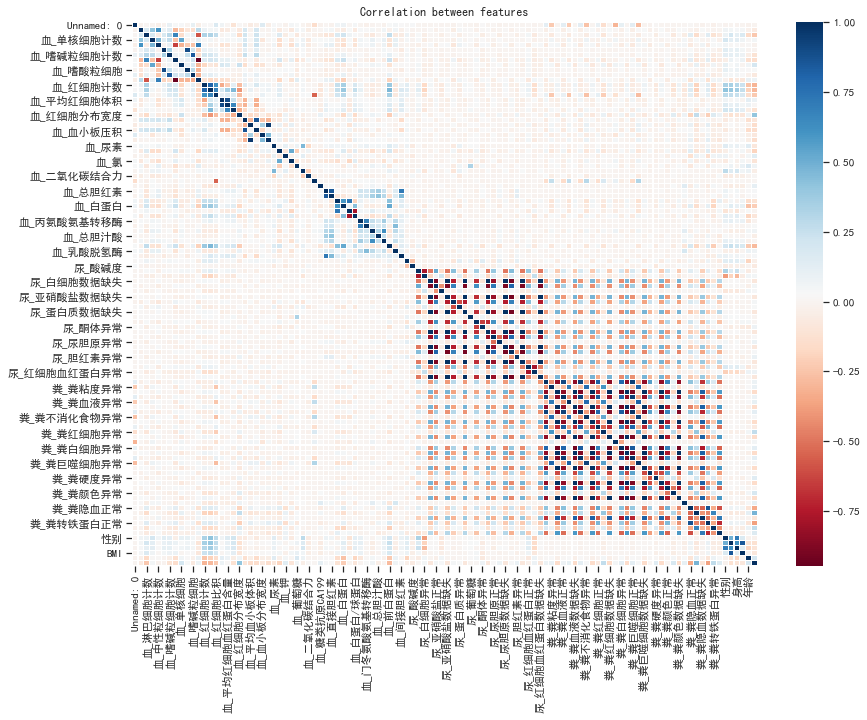

In [176]:
corr = df.corr()
# print(corr)
f, ax= plt.subplots(figsize = (14, 10))
rc = {'font.sans-serif': 'SimHei','axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.heatmap(corr,cmap='RdBu', linewidths = 0.05, ax = ax)
# 设置Axes的标题
ax.set_title('Correlation between features')
plt.show()
#plt.close()
#f.savefig('sns_style_origin.jpg', dpi=100, bbox_inches='tight')


In [22]:
df[abs(df["血_血红蛋白"]/df["血_红细胞计数"]-df["血_平均红细胞血红蛋白含量"])>0.1]

,Unnamed: 0,PATIENT_ID,血_白细胞计数,血_淋巴细胞计数,血_单核细胞计数,血_中性粒细胞计数,血_嗜酸粒细胞计数,血_嗜碱粒细胞计数,血_淋巴细胞,血_单核细胞,血_嗜酸粒细胞,血_嗜碱粒细胞,血_中性粒细胞,血_红细胞计数,血_血红蛋白,血_红细胞比积,血_平均红细胞体积,血_平均红细胞血红蛋白含量,血_平均红细胞血红蛋白浓度,血_红细胞分布宽度,血_血小板计数,血_平均血小板体积,血_血小板压积,血_血小板分布宽度,血_大血小板细胞比率,血_尿素,血_钠,血_钾,血_氯,血_葡萄糖,血_肌酐,血_二氧化碳结合力,血_尿酸,血_糖类抗原CA199,血_总胆红素,血_直接胆红素,血_总蛋白,血_白蛋白,血_球蛋白,血_白蛋白/球蛋白,血_丙氨酸氨基转移酶,血_门冬氨酸氨基转移酶,血_碱性磷酸酶,血_总胆汁酸,血_γ-谷氨酰转肽酶,血_前白蛋白,血_乳酸脱氢酶,血_间接胆红素,尿_比重,尿_酸碱度,尿_白细胞正常,尿_白细胞异常,尿_白细胞数据缺失,尿_亚硝酸盐正常,尿_亚硝酸盐异常,尿_亚硝酸盐数据缺失,尿_蛋白质正常,尿_蛋白质异常,尿_蛋白质数据缺失,尿_葡萄糖,尿_酮体正常,尿_酮体异常,尿_酮体数据缺失,尿_尿胆原正常,尿_尿胆原异常,尿_尿胆原数据缺失,尿_胆红素正常,尿_胆红素异常,尿_胆红素数据缺失,尿_红细胞血红蛋白正常,尿_红细胞血红蛋白异常,尿_红细胞血红蛋白数据缺失,粪_粪粘度正常,粪_粪粘度异常,粪_粪粘度数据缺失,粪_粪血液正常,粪_粪血液异常,粪_粪血液数据缺失,粪_粪不消化食物正常,粪_粪不消化食物异常,粪_粪不消化食物数据缺失,粪_粪红细胞正常,粪_粪红细胞异常,粪_粪红细胞数据缺失,粪_粪白细胞正常,粪_粪白细胞异常,粪_粪白细胞数据缺失,粪_粪巨噬细胞正常,粪_粪巨噬细胞异常,粪_粪巨噬细胞数据缺失,粪_粪硬度正常,粪_粪硬度异常,粪_粪硬度数据缺失,粪_粪颜色正常,粪_粪颜色异常,粪_粪颜色数据缺失,血_癌胚抗原,粪_粪隐血正常,粪_粪隐血异常,粪_粪隐血数据缺失,粪_粪转铁蛋白正常,粪_粪转铁蛋白异常,粪_粪转铁蛋白数据缺失,性别,体重,身高,BMI,年龄,癌
21,21,K02190851,7.48,1.40,0.43,5.44,0.19,0.02,18.7,5.7,2.6,0.2,72.8,4.25,128,40.0,94.0,30.0,319,12.1,243,9.5,0.23,16.2,23.1,4.3,144,3.6,105,6.9,80,26,0.32,7.94,9.5,3.8,68,41.0,27,1.52,21,20,84,11.7,22,243,156,5.7,1.014,6.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2.48,1,0,0,1,0,0,1.0,72.142857,165.857143,26.225573,74,0
66,66,03323327,10.11,0.59,0.74,8.74,0.01,0.02,5.9,7.4,0.1,0.2,86.4,3.90,120,36.0,92.3,30.6,332,12.6,243,8.8,0.21,15.7,18.1,4.7,144,3.7,104,8.2,58,24,0.11,11.55,14.7,5.5,67,36.0,31,1.16,44,41,140,1.5,88,249,138,9.2,1.029,5.5,0,1,0,1,0,0,0,1,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,2.04,1,0,0,1,0,0,0.0,62.000000,158.000000,24.835763,59,0
72,72,03383658,9.77,1.08,0.71,7.94,0.02,0.02,11.0,7.3,0.2,0.2,81.3,4.28,132,39.1,91.5,30.7,336,12.9,198,7.9,0.16,15.5,11.4,5.5,146,3.5,106,6.1,78,25,0.30,4.77,15.4,4.7,62,35.0,27,1.30,35,32,114,1.9,182,257,149,10.7,1.034,5.5,1,0,0,1,0,0,0,1,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,2.11,0,1,0,0,1,0,1.0,67.000000,165.000000,24.609734,61,0
121,121,02264780,3.32,1.32,0.29,1.63,0.06,0.02,39.5,8.9,2.0,0.6,49.0,3.88,111,33.9,87.2,28.5,327,12.7,190,10.8,0.21,16.5,31.3,4.7,144,4.3,105,4.5,73,25,0.21,83.54,9.9,3.4,64,54.4,28,1.29,35,35,45,7.0,16,139,125,6.5,1.028,5.5,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1.75,0,0,1,0,0,1,0.0,65.000000,165.000000,23.875115,36,0
150,150,02264755,9.64,2.70,0.80,4.23,1.85,0.06,28.0,8.3,19.2,0.7,43.8,3.93,121,36.0,91.6,30.9,337,12.5,188,8.5,0.16,15.9,16.3,7.5,146,3.5,106,4.3,62,27,0.32,9.64,34.4,9.5,60,36.0,24,1.50,21,16,32,2.1,24,234,153,24.9,1.040,5.5,1,0,0,1,0,0,1,0,0,60.0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,3.29,1,0,0,1,0,0,1.0,64.000000,170.000000,22.145329,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26265,26265,J02729397,9.23,2.39,0.55,6.25,0.02,0.02,25.9,6.0,0.2,0.2,67.7,4.37,133,15.6,96.3,30.2,314,11.8,150,10.1,0.15,11.4,24.6,6.6,139,4.3,112,7.2,42,27,0.20,6.97,7.7,8.3,66,30.0,24,1.75,56,35,145,5.0,29,179,209,10.2,1.018,6.0,0,0,1,0,0,1,0,0,1,6.0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0.92,0,1,0,0,0,1,0.0,60.000000,160.000000,23.437500,62,0
26326,26326,05620139,10.86,0.61,0.65,9.56,0.03,0.01,5.6,6.0,0.3,0.1,88.0,5.16,156,45.7,88.6,30.1,340,12.5,157,10.4,0.16,16.7,30.0,5.3,143,4.0,105,11.9,91,29,0.35,2.48,30.5,3.5,68,42.0,26,1.62,123,185,127,10.7,492,247,194,8.3,1.018,6.0,0,0,1,0,0,1,0,0,1,6.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1.88,0,0,1,0,0,1,1.0,90.000000,172.000000,

In [26]:
df[["血_平均红细胞体积","血_红细胞比积","血_红细胞计数"]]

,血_平均红细胞体积,血_红细胞比积,血_红细胞计数
0,95.3,48.40,5.08
1,90.4,43.50,4.81
2,95.7,35.20,3.68
3,96.9,37.20,3.84
4,91.2,27.90,3.06
...,...,...,...
26653,93.1,39.00,4.19
26654,97.7,43.10,4.41
26655,97.1,40.00,4.12
26656,87.3,0.34,3.86


In [178]:
np.corrcoef(df["粪_粪血液数据缺失"],df["粪_粪白细胞数据缺失"])

array([[1.        , 0.99956502],
       [0.99956502, 1.        ]])

In [179]:
df[df["粪_粪血液数据缺失"]!=df["粪_粪白细胞数据缺失"]]

,Unnamed: 0,PATIENT_ID,血_白细胞计数,血_淋巴细胞计数,血_单核细胞计数,血_中性粒细胞计数,血_嗜酸粒细胞计数,血_嗜碱粒细胞计数,血_淋巴细胞,血_单核细胞,血_嗜酸粒细胞,血_嗜碱粒细胞,血_中性粒细胞,血_红细胞计数,血_血红蛋白,血_红细胞比积,血_平均红细胞体积,血_平均红细胞血红蛋白含量,血_平均红细胞血红蛋白浓度,血_红细胞分布宽度,血_血小板计数,血_平均血小板体积,血_血小板压积,血_血小板分布宽度,血_大血小板细胞比率,血_尿素,血_钠,血_钾,血_氯,血_葡萄糖,血_肌酐,血_二氧化碳结合力,血_尿酸,血_糖类抗原CA199,血_总胆红素,血_直接胆红素,血_总蛋白,血_白蛋白,血_球蛋白,血_白蛋白/球蛋白,血_丙氨酸氨基转移酶,血_门冬氨酸氨基转移酶,血_碱性磷酸酶,血_总胆汁酸,血_γ-谷氨酰转肽酶,血_前白蛋白,血_乳酸脱氢酶,血_间接胆红素,尿_比重,尿_酸碱度,尿_白细胞正常,尿_白细胞异常,尿_白细胞数据缺失,尿_亚硝酸盐正常,尿_亚硝酸盐异常,尿_亚硝酸盐数据缺失,尿_蛋白质正常,尿_蛋白质异常,尿_蛋白质数据缺失,尿_葡萄糖,尿_酮体正常,尿_酮体异常,尿_酮体数据缺失,尿_尿胆原正常,尿_尿胆原异常,尿_尿胆原数据缺失,尿_胆红素正常,尿_胆红素异常,尿_胆红素数据缺失,尿_红细胞血红蛋白正常,尿_红细胞血红蛋白异常,尿_红细胞血红蛋白数据缺失,粪_粪粘度正常,粪_粪粘度异常,粪_粪粘度数据缺失,粪_粪血液正常,粪_粪血液异常,粪_粪血液数据缺失,粪_粪不消化食物正常,粪_粪不消化食物异常,粪_粪不消化食物数据缺失,粪_粪红细胞正常,粪_粪红细胞异常,粪_粪红细胞数据缺失,粪_粪白细胞正常,粪_粪白细胞异常,粪_粪白细胞数据缺失,粪_粪巨噬细胞正常,粪_粪巨噬细胞异常,粪_粪巨噬细胞数据缺失,粪_粪硬度正常,粪_粪硬度异常,粪_粪硬度数据缺失,粪_粪颜色正常,粪_粪颜色异常,粪_粪颜色数据缺失,血_癌胚抗原,粪_粪隐血正常,粪_粪隐血异常,粪_粪隐血数据缺失,粪_粪转铁蛋白正常,粪_粪转铁蛋白异常,粪_粪转铁蛋白数据缺失,性别,体重,身高,BMI,年龄,癌
3534,3534,05934628,4.64,1.67,0.36,2.51,0.08,0.02,36.0,7.8,1.7,0.4,54.1,4.72,134,39.4,83.5,28.4,340,12.2,180,10.3,0.18,11.7,27.5,5.1,139,3.9,104,5.0,51,26,0.42,10.44,15.8,3.2,75,43.0,32,1.34,18,20,81,0.9,23,242,187,12.6,1.026,6.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1.85,0,1,0,0,0,1,0.0,60.0,158.0,24.034610,52,1
9324,9324,04386631,5.87,1.41,0.44,3.80,0.19,0.03,24.0,7.5,3.2,0.5,64.8,5.05,147,44.3,87.7,29.1,332,12.6,213,9.9,0.21,10.9,23.1,7.5,137,3.9,100,7.3,72,27,0.31,22.42,7.3,2.2,55,33.0,22,1.50,41,32,86,1.3,26,159,195,5.1,1.012,6.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1.75,0,1,0,0,1,0,1.0,74.0,180.0,22.839506,61,1
20489,20489,05372469,9.60,2.02,0.64,6.81,0.12,0.01,21.1,6.6,1.2,0.1,71.0,4.83,145,45.3,93.7,30.0,321,12.6,233,9.5,0.22,16.3,23.0,8.4,142,4.9,103,5.0,73,26,0.33,4.46,12.9,2.2,71,37.0,34,1.09,12,15,71,2.2,14,214,162,10.7,1.028,5.0,1,0,0,1,0,0,1,0,0,6.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,26.63,0,1,0,0,0,1,1.0,57.5,165.0,21.120294,53,1
21339,21339,03626262,4.51,2.21,0.29,1.90,0.11,0.00,49.0,6.4,2.4,0.0,42.2,4.66,146,42.4,91.0,31.3,344,13.8,223,8.9,0.20,9.6,16.1,2.7,135,3.9,95,4.9,78,26,0.23,2.21,13.2,4.3,85,49.0,36,1.36,49,51,103,21.5,123,276,167,8.0,1.015,5.0,1,0,0,1,0,0,0,1,0,6.0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,5.73,0,1,0,0,0,1,1.0,62.5,175.0,20.408163,26,1


In [180]:
binary_list=["尿_白细胞","尿_亚硝酸盐","尿_蛋白质","尿_酮体","尿_尿胆原","尿_胆红素","尿_红细胞血红蛋白","粪_粪隐血","粪_粪不消化食物",
             "粪_粪巨噬细胞","粪_粪白细胞","粪_粪硬度","粪_粪粘度","粪_粪红细胞","粪_粪血液","粪_粪转铁蛋白","粪_粪颜色"]
binary_list_1=["尿_白细胞数据缺失","尿_亚硝酸盐数据缺失","尿_蛋白质数据缺失","尿_酮体数据缺失","尿_尿胆原数据缺失","尿_胆红素数据缺失","尿_红细胞血红蛋白数据缺失"]
binary_list_2=["粪_粪隐血数据缺失","粪_粪不消化食物数据缺失",
             "粪_粪巨噬细胞数据缺失","粪_粪白细胞数据缺失","粪_粪硬度数据缺失","粪_粪粘度数据缺失","粪_粪红细胞数据缺失",
               "粪_粪血液数据缺失","粪_粪转铁蛋白数据缺失","粪_粪颜色数据缺失"]

In [181]:
#统计只做了部分项的数量
m=0
for s in df.index:
    total_sum=sum([df[i].loc[s] for i in binary_list_2])
    if total_sum==3:
        m+=1
m
# 粪是不是

2

In [186]:
sum(df["粪_粪隐血数据缺失"]==1) #and df["粪_粪不消化食物数据缺失"]==1

7872

In [193]:
sum(df["粪_粪转铁蛋白数据缺失"]==1)

12034